#Student Name: Justin Figueroa
#ECE 595 Machine Learning II
#Project 2: Autoencoders - Student Code

In [1]:
#Import necessary packages
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K

#Part 0: Importing and Normalizing Data

In [2]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


#Part 1: Deep Fully-Connected AutoEncoder

Answer the following questions: 


1.  We want to predict output values of the intensity of the pixels which are between 0 to 1. Therefore choice of output layer activation function is important. (Open ended reasoning question). (a) Choose 'softmax’ or ‘sigmoid’. Reason why one is preferred over the other.
 

  ANS: The intensity of the pixels is between 0 and 1 for this problem so we should use a sigmodial activation function. Sigmoid is preferred over softmax because it is intended for bournoulli distrbutions, whereas the softmax is intended for multinoulli distributions. Though we are intending to predict what number is being shown out of multiple options, we are only using this activation function for the pixel intensity, so there are only two classes.

In [ ]:
#Reshape training and testing data into 784-dimensional vectors
data_train = data_train.reshape(60000, 784)
data_test = data_test.reshape(10000, 784)

In [ ]:
#Create autoencoder architecture
def deep_ae():
    model = Sequential()

    #400 perceptrons
    model.add(Dense(400, activation="relu", kernel_initializer="uniform", input_dim=784))
    
    #200 perceptrons
    model.add(Dense(200, activation="relu", kernel_initializer="uniform"))
    
    #100 perceptrons
    model.add(Dense(100, activation="relu", kernel_initializer="uniform"))
    
    #200 perceptrons
    model.add(Dense(200, activation="relu", kernel_initializer="uniform"))
    
    #400 perceptrons
    model.add(Dense(400, activation="relu", kernel_initializer="uniform"))
    
    #output 784 perceptrons
    model.add(Dense(784, activation="sigmoid", kernel_initializer="uniform"))
    
    return model

#Create deep autoencoder graph
deep_ae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
deep_ae.compile(loss="binary_crossentropy", optimizer="sgd")

#Train the model and assign training meta-data to a variable
num_epochs = 150
batch_size = 1024
deep_ae_history_BCE = deep_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs, batch_size=batch_size, shuffle=True)


#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = deep_ae.predict(data_test)


#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test])[0]

Epoch 1/150
59/59 [==============================] - 8s 124ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 2/150
59/59 [==============================] - 7s 122ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 3/150
59/59 [==============================] - 7s 122ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 4/150
59/59 [==============================] - 7s 119ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 5/150
59/59 [==============================] - 7s 116ms/step - loss: 0.6925 - val_loss: 0.6925
Epoch 6/150
59/59 [==============================] - 7s 116ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 7/150
59/59 [==============================] - 7s 115ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 8/150
59/59 [==============================] - 7s 125ms/step - loss: 0.6921 - val_loss: 0.6920
Epoch 9/150
59/59 [==============================] - 7s 115ms/step - loss: 0.6920 - val_loss: 0.6919
Epoch 10/150
59/59 [==============================] - 7s 115ms/step - loss: 0.6918 - val_lo

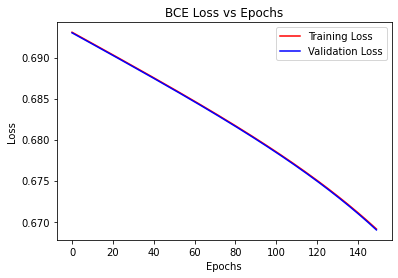

In [ ]:
#Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]
a = plt.plot(deep_ae_history_BCE.history['loss'], color="red", label="Training Loss")
b = plt.plot(deep_ae_history_BCE.history['val_loss'], color="blue", label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("BCE Loss vs Epochs")

plt.legend(loc="best")

plt.show()

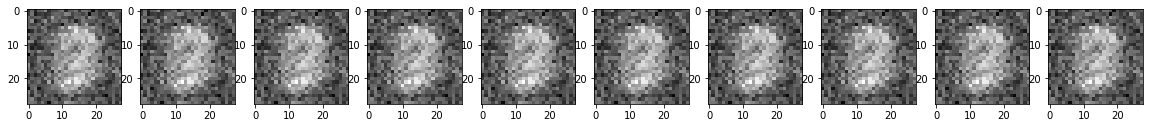

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
plt.figure(figsize=(20, 4))

for i in range(10):
  ax = plt.subplot(1,10, i + 1)
  plt.imshow(reconstructions[i].reshape(28, 28))
  plt.gray()

plt.show()

Answer the following questions: 


1.  Question 2c: BONUS [reasoning question]: Pair the output layer activation and loss function which performs better together. Linear, sigmoid, Binary cross entropy and Mean Square error

ANS: The best activation for this network would be a sigmoid, as noted in question 1. This is because we are predicting one class of outputs. As for the loss function, we would have to choose the BCE loss function as it tends to show lower costs than the MSE funnction, and appears to be fairly linear.
 

2.  Question 5: Which loss function is better and why?

ANS: THE BSe loss function is more linear and performs better, as shown in the plots above. This is due to the fact that the BSE function is able to predict error values reltaed to pixel brightness. Therefore, the BCE function calculates a more adaptive loss to improve its weights.

3.  Question 6: If we were to predict pixels values [0 to 255] directly at the output of last layer. Should there be an activation function in last later?  If yes, which activation function and why?,  If No, reason why?

ANS: There should be an activation function in the last layer. A ReLU function is preferable because one of the main benefits of the ReLU function is that negative pixel values are easily removed through it, as they would not be a possibility in this case.

#Part 2: Deep Convolutional AutoEncoder

In [3]:
#Reshape data into 2-D signals and account for grayscale channel in each image
data_train = data_train.reshape((-1, 28, 28, 1))
data_test = data_test.reshape((-1, 28, 28, 1))

In [ ]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2))) #2x2 upsampling
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2))) #2x2 upsampling
    model.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))

    return model

#Create deep autoencoder graph
conv_ae = cae()

#Compile model using an appropriate loss and optimizer algorithm
conv_ae.compile(loss="mse", optimizer="sgd")

#Train the model and assign training meta-data to a variable
num_epochs = 150
batch_size = 1024
conv_ae_history_MSE = conv_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs, batch_size=batch_size, shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = conv_ae.predict(data_test)


#Obtain encoder representation of data
# The fourth hidden layer are indexed at 3
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test])[0]

Epoch 1/150
59/59 [==============================] - 62s 1s/step - loss: 0.2145 - val_loss: 0.1901
Epoch 2/150
59/59 [==============================] - 61s 1s/step - loss: 0.1702 - val_loss: 0.1527
Epoch 3/150
59/59 [==============================] - 61s 1s/step - loss: 0.1395 - val_loss: 0.1301
Epoch 4/150
59/59 [==============================] - 61s 1s/step - loss: 0.1230 - val_loss: 0.1194
Epoch 5/150
59/59 [==============================] - 61s 1s/step - loss: 0.1152 - val_loss: 0.1141
Epoch 6/150
59/59 [==============================] - 61s 1s/step - loss: 0.1110 - val_loss: 0.1109
Epoch 7/150
59/59 [==============================] - 61s 1s/step - loss: 0.1083 - val_loss: 0.1086
Epoch 8/150
59/59 [==============================] - 62s 1s/step - loss: 0.1062 - val_loss: 0.1067
Epoch 9/150
59/59 [==============================] - 62s 1s/step - loss: 0.1044 - val_loss: 0.1050
Epoch 10/150
59/59 [==============================] - 62s 1s/step - loss: 0.1028 - val_loss: 0.1034
Epoch 11/

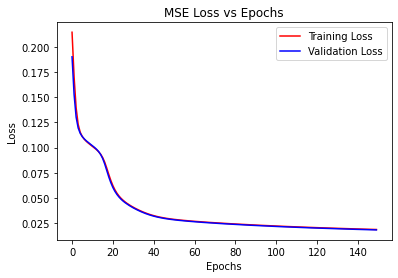

In [ ]:
#Plot loss vs epoch  for BCE and MSE [Together or separate, Both accepted]
a = plt.plot(conv_ae_history_MSE.history['loss'], color="red", label="Training Loss")
b = plt.plot(conv_ae_history_MSE.history['val_loss'], color="blue", label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MSE Loss vs Epochs")

plt.legend(loc="best")

plt.show()

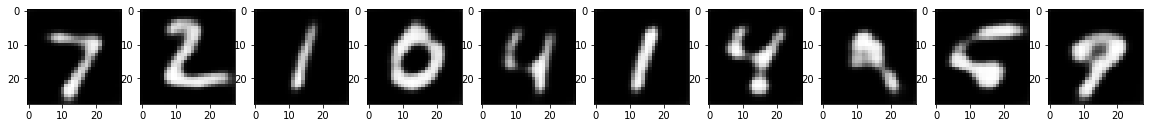

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
plt.figure(figsize=(20, 4))

for i in range(10):
  ax = plt.subplot(1,10, i + 1)
  plt.imshow(reconstructions[i].reshape(28, 28))
  plt.gray()

plt.show()

In [4]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2))) #2x2 upsampling
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2))) #2x2 upsampling
    model.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))

    return model

#Create deep autoencoder graph
conv_ae = cae()

#Compile model using an appropriate loss and optimizer algorithm
conv_ae.compile(loss="binary_crossentropy", optimizer="sgd")

#Train the model and assign training meta-data to a variable
num_epochs = 150
batch_size = 1024
conv_ae_history_BCE = conv_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs, batch_size=batch_size, shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = conv_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl = get_hl([data_test])[0]

Epoch 1/150
59/59 [==============================] - 70s 1s/step - loss: 0.5819 - val_loss: 0.5012
Epoch 2/150
59/59 [==============================] - 71s 1s/step - loss: 0.4667 - val_loss: 0.4482
Epoch 3/150
59/59 [==============================] - 62s 1s/step - loss: 0.4319 - val_loss: 0.4226
Epoch 4/150
59/59 [==============================] - 62s 1s/step - loss: 0.4089 - val_loss: 0.4012
Epoch 5/150
59/59 [==============================] - 63s 1s/step - loss: 0.3881 - val_loss: 0.3800
Epoch 6/150
59/59 [==============================] - 61s 1s/step - loss: 0.3648 - val_loss: 0.3526
Epoch 7/150
59/59 [==============================] - 61s 1s/step - loss: 0.3312 - val_loss: 0.3111
Epoch 8/150
59/59 [==============================] - 61s 1s/step - loss: 0.2866 - val_loss: 0.2641
Epoch 9/150
59/59 [==============================] - 61s 1s/step - loss: 0.2451 - val_loss: 0.2300
Epoch 10/150
59/59 [==============================] - 61s 1s/step - loss: 0.2195 - val_loss: 0.2110
Epoch 11/

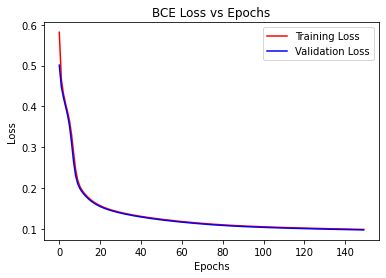

In [5]:
#Plot loss vs epoch  for BCE and MSE [Together or separate, Both accepted]
a = plt.plot(conv_ae_history_BCE.history['loss'], color="red", label="Training Loss")
b = plt.plot(conv_ae_history_BCE.history['val_loss'], color="blue", label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("BCE Loss vs Epochs")

plt.legend(loc="best")

plt.show()

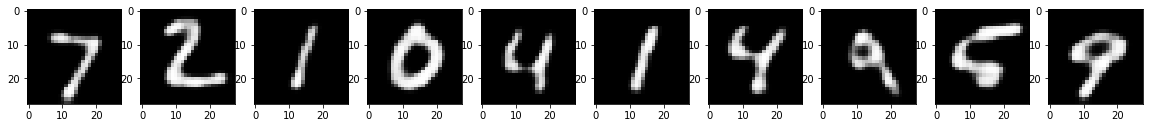

In [6]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES
plt.figure(figsize=(20, 4))

for i in range(10):
  ax = plt.subplot(1,10, i + 1)
  plt.imshow(reconstructions[i].reshape(28, 28))
  plt.gray()

plt.show()

Answer the following questions: 


1.  Question 4: Which loss function is better and why?

ANS: The MSE loss is much better than the BCE loss as can be seen in the reconstructed figures. Graphically, the main distinction is that the MSE loss approaches a value of 0.0025 and the BCE loss approaches a greater value of roguhly 0.1.

#Part 3: Denoising AutoEncoder

In [ ]:
#Inject noise into testing data
noise_factor = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

#Reshape data to comply with input of denoising autoencoder
data_train_noisy = data_train_noisy.reshape((-1, 28, 28, 1))
data_test_noisy = data_test_noisy.reshape((-1, 28, 28, 1))

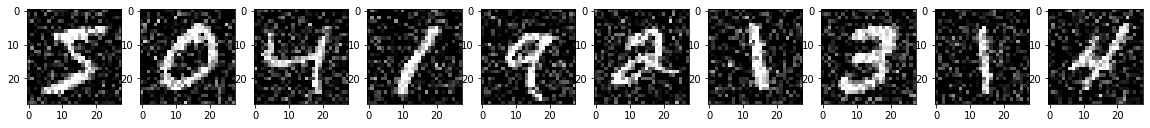

In [ ]:
#Show samples of 10 original images and their corrsponding noisy counterparts from the training set
plt.figure(figsize=(20, 4))

for i in range(10):
  ax = plt.subplot(1,10, i + 1)
  plt.imshow(data_train_noisy[i].reshape(28, 28))
  plt.gray()

plt.show()

In [ ]:
#Create denoising autoencoder architecture
def dae():
    
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2))) #2x2 upsampling
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2))) #2x2 upsampling
    model.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))
    return model
  

  
#Compile and train the DAE
denoise_ae = dae()

denoise_ae.compile(loss="mse", optimizer="sgd")

num_epochs = 150
batch_size = 1024
denoise_ae_history = denoise_ae.fit(data_train_noisy, data_train, validation_data=(data_test_noisy, data_test), epochs=num_epochs, batch_size=batch_size, shuffle=True)


#Generate denoised versions of noisy inputs
reconstructions = denoise_ae.predict(data_test_noisy)

get_hl = K.function([denoise_ae.layers[0].input], [denoise_ae.layers[3].output])
denoise_ae_hl = get_hl([data_test_noisy])[0]


Epoch 1/150
59/59 [==============================] - 64s 1s/step - loss: 0.1984 - val_loss: 0.1682
Epoch 2/150
59/59 [==============================] - 62s 1s/step - loss: 0.1445 - val_loss: 0.1289
Epoch 3/150
59/59 [==============================] - 62s 1s/step - loss: 0.1216 - val_loss: 0.1189
Epoch 4/150
59/59 [==============================] - 63s 1s/step - loss: 0.1155 - val_loss: 0.1154
Epoch 5/150
59/59 [==============================] - 63s 1s/step - loss: 0.1128 - val_loss: 0.1132
Epoch 6/150
59/59 [==============================] - 63s 1s/step - loss: 0.1108 - val_loss: 0.1113
Epoch 7/150
59/59 [==============================] - 63s 1s/step - loss: 0.1090 - val_loss: 0.1095
Epoch 8/150
59/59 [==============================] - 63s 1s/step - loss: 0.1072 - val_loss: 0.1076
Epoch 9/150
59/59 [==============================] - 63s 1s/step - loss: 0.1052 - val_loss: 0.1055
Epoch 10/150
59/59 [==============================] - 63s 1s/step - loss: 0.1032 - val_loss: 0.1035
Epoch 11/

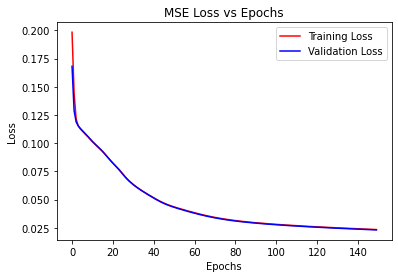

In [ ]:
#Plot loss vs epoch
a = plt.plot(denoise_ae_history.history['loss'], color="red", label="Training Loss")
b = plt.plot(denoise_ae_history.history['val_loss'], color="blue", label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MSE Loss vs Epochs")

plt.legend(loc="best")

plt.show()

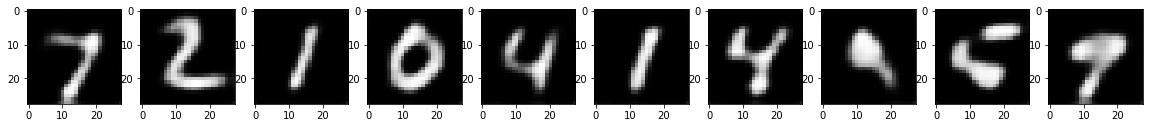

In [ ]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
plt.figure(figsize=(20, 4))

for i in range(10):
  ax = plt.subplot(1,10, i + 1)
  plt.imshow(reconstructions[i].reshape(28, 28))
  plt.gray()

plt.show()